# Bibliotecas Necessárias
Para a execução deste projeto é necessário a utilização das bibliotecas pandas e matplotlib, sendo necessário realizar a instação:

!pip install pandas matplotlib

Após isso é necessário realizar a importação das bibliotecas que serão utilizadas no decorrer dos códigos

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Gráfico de Barras - 5 Apps com maiores números de instalação

O código carrega um conjunto de dados do arquivo 'googleplaystore.csv' usando a biblioteca pandas. Ele remove linhas duplicadas do DataFrame resultante e trata um problema específico com uma linha problemática no conjunto de dados. Em seguida, ordena os dados com base no número de instalações em ordem decrescente e seleciona os cinco principais aplicativos com base nesse critério.

Posteriormente, ele cria um gráfico de barras utilizando os nomes dos aplicativos e o número de instalações como os eixos x e y, respectivamente. O gráfico mostra os cinco aplicativos mais instalados.

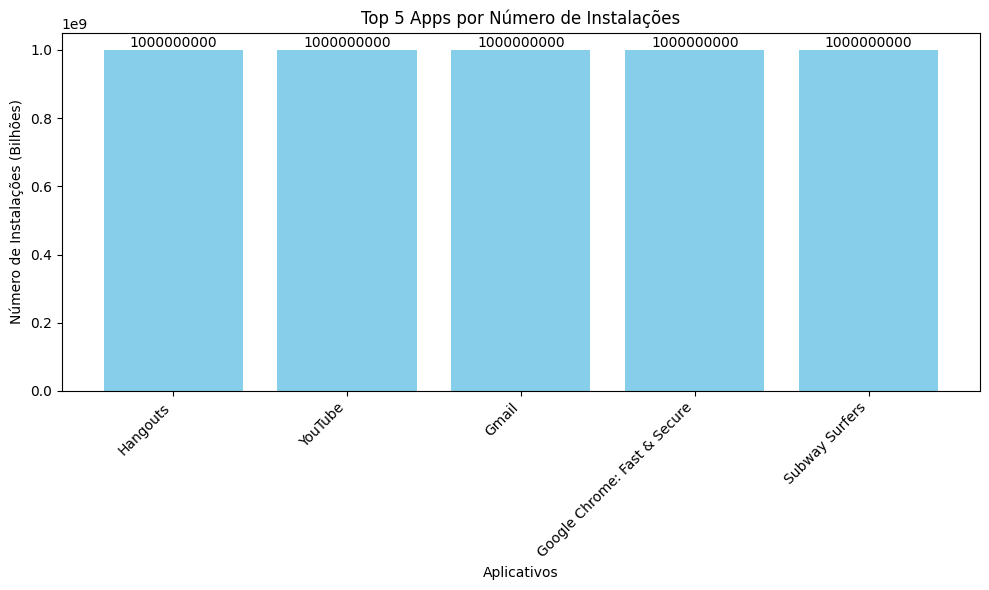

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
df = pd.read_csv("googleplaystore.csv")

# Remover linhas duplicadas
df.drop_duplicates(inplace=True)

""" O aplicativo "Life Made Wi-Fi TouchScreen Photo Frame" foi inserido de forma incorreta na base de dados
se fazendo necessário retirar do gráfico, não interferindo no resultado, pois há uma grande quantidade
de apps que alcalçaram esse resulado de "1bi+" """

# Remover a linha problemática
df = df[df["App"] != "Life Made WI-Fi Touchscreen Photo Frame"]

# Ajustar a coluna 'Installs' para tratar os valores como números
df["Installs"] = df["Installs"].str.replace(",", "")  # Remover vírgulas
df["Installs"] = df["Installs"].str.replace("+", "")  # Remover o sinal de mais
df["Installs"] = df["Installs"].astype(int)  # Converter para inteiro

# Ordenar o DataFrame pelo número de instalações em ordem decrescente
df_sorted = df.sort_values(by="Installs", ascending=False)

# Selecionar os top 5 aplicativos por número de instalações
top_5_apps = df_sorted.head(5)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_apps["App"], top_5_apps["Installs"], color="skyblue")

# Adicionar os números de instalações nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, yval, int(yval), ha="center", va="bottom"
    )

# Printar o resultado no gráfico
plt.title("Top 5 Apps por Número de Instalações")
plt.xlabel("Aplicativos")
plt.ylabel("Número de Instalações (Bilhões)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Gráfico de Pizza - Categorias de APPs


Este código Python carrega um arquivo CSV que contém dados sobre aplicativos da Google Play Store. Ele cria um gráfico de pizza para mostrar a distribuição das categorias de aplicativos no conjunto de dados.

Primeiro, o código tenta carregar o arquivo CSV e, se for bem-sucedido, conta a frequência de cada categoria de aplicativo. Em seguida, utiliza esses dados para criar o gráfico de pizza, mostrando as porcentagens de cada categoria.

O gráfico é exibido com um título e a formatação apropriada para garantir uma boa apresentação visual.

O código também trata possíveis erros, como arquivo não encontrado ou problemas ao carregar o arquivo CSV.

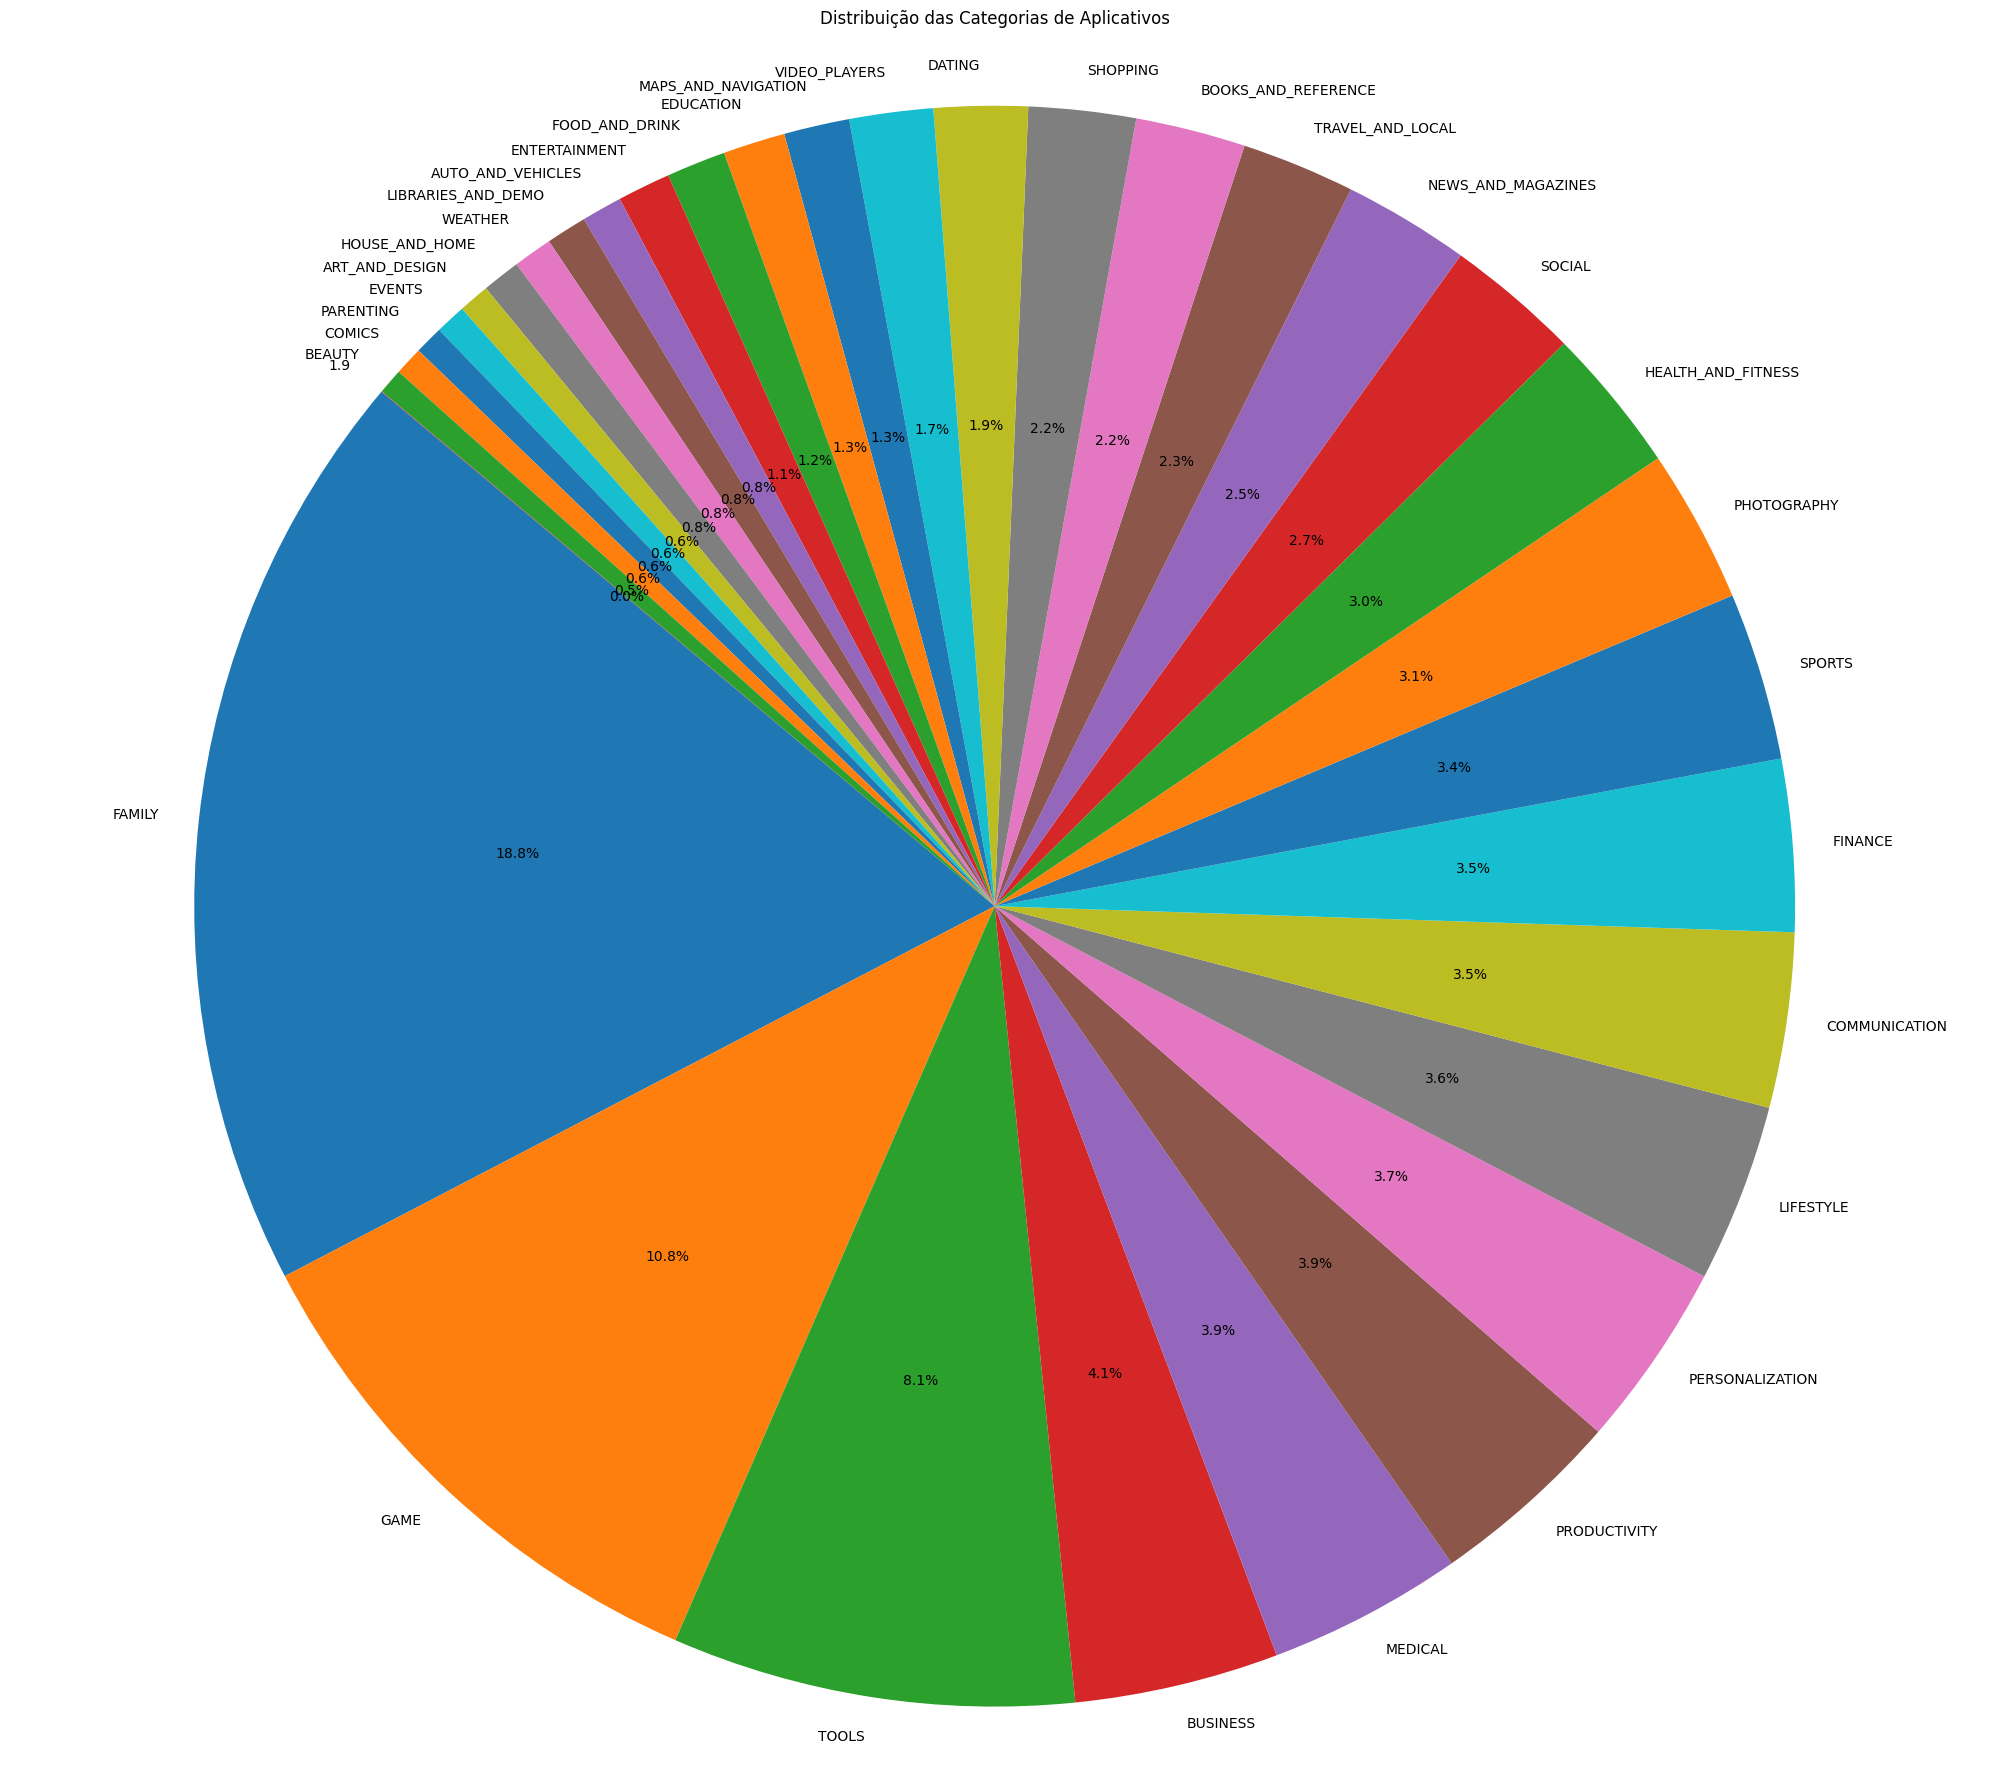

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuração do tamanho da fonte globalmente
plt.rcParams.update({"font.size": 10})

try:
    # Carregar o arquivo CSV
    df = pd.read_csv("googleplaystore.csv")

    # Remover linhas duplicadas
    df.drop_duplicates(inplace=True)

    # Contar a frequência de cada categoria de aplicativo
    category_counts = df["Category"].value_counts()

    # Criar o gráfico de pizza
    plt.figure(figsize=(20, 18))  # Aumentar o tamanho do gráfico
    plt.pie(
        category_counts,
        labels=category_counts.index,
        autopct="%1.1f%%",
        startangle=140,
        labeldistance=1.05,
    )  # Aumentar a distância entre os rótulos e as fatias
    plt.title("Distribuição das Categorias de Aplicativos")
    plt.axis("equal")  # Faz o gráfico de pizza parecer um círculo
    plt.tight_layout()  # Ajusta automaticamente o layout para evitar cortes
    plt.show()

except FileNotFoundError:
    print(
        "Erro: Arquivo não encontrado. Certifique-se de que o nome do arquivo está correto e o arquivo está na pasta correta."
    )

except Exception as e:
    print("Erro ao carregar o arquivo CSV:", e)

# App mais caro existente no DataSet

Este código lê um arquivo CSV contendo dados sobre aplicativos do Google Play Store.

Ele remove linhas duplicadas e filtra aplicativos com preços válidos, convertendo os preços para um formato numérico. Em seguida, identifica os três aplicativos mais caros e os exibe em uma tabela. O código utiliza pandas para manipulação dos dados e matplotlib para criação da tabela.

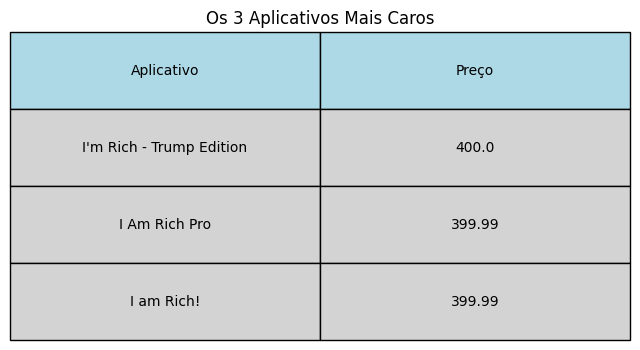

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Carregar o arquivo CSV
    df = pd.read_csv("googleplaystore.csv")

    # Remover linhas duplicadas e valores não numéricos na coluna 'Price'
    df = df.drop_duplicates().loc[
        df["Price"].str.replace(".", "").str[1:].str.isdigit() | (df["Price"] == "Free")
    ]

    # Converter a coluna 'Price' para um formato numérico
    df["Price"] = df["Price"].str.replace("$", "").replace("Free", "0").astype(float)

    # Ordenar o DataFrame pelo preço em ordem decrescente
    df_sorted_by_price = df.sort_values(by="Price", ascending=False)

    # Selecionar os três aplicativos mais caros
    top_3_expensive_apps = df_sorted_by_price.head(3)

    # Criar uma tabela com o ranking dos aplicativos mais caros
    plt.figure(figsize=(8, 4))
    plt.table(
        cellText=top_3_expensive_apps[["App", "Price"]].values,
        colLabels=["Aplicativo", "Preço"],
        loc="center",
        cellLoc="center",
        colColours=["lightblue", "lightblue"],
        cellColours=[
            ["lightgray", "lightgray"],
            ["lightgray", "lightgray"],
            ["lightgray", "lightgray"],
        ],
        bbox=[0, 0, 1, 1],
    )
    plt.axis("off")
    plt.title("Os 3 Aplicativos Mais Caros")
    plt.show()

except FileNotFoundError:
    print(
        "Erro: Arquivo não encontrado. Certifique-se de que o nome do arquivo está correto e o arquivo está na pasta correta."
    )

except Exception as e:
    print("Erro ao carregar o arquivo CSV:", e)

# Apps classificados como "Mature 17+"

Primeiramente, ele carrega um arquivo CSV contendo informações sobre os aplicativos, em seguida, remove linhas duplicadas para garantir a consistência dos dados. Em seguida, o código conta a quantidade de aplicativos classificados como "Mature 17+" e cria uma tabela utilizando matplotlib para exibir essa informação de forma clara e concisa.

Caso o arquivo CSV não seja encontrado ou ocorra algum erro durante o processo, o código exibirá uma mensagem de erro indicando o problema encontrado. Este código oferece uma maneira eficiente de visualizar a quantidade de aplicativos classificados como "Mature 17+" na base de dados do Google Play Store, facilitando a compreensão e análise dos dados.

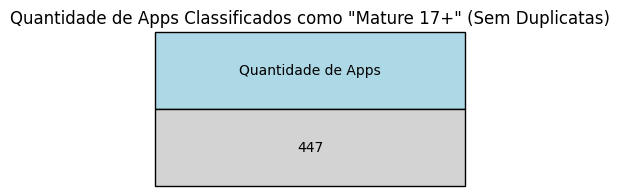

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Carregar o arquivo CSV e remover linhas duplicadas
    df = pd.read_csv("googleplaystore.csv")
    df.drop_duplicates(inplace=True)

    # Contar a quantidade de apps classificados como "Mature 17+"
    mature_apps_count = (df["Content Rating"] == "Mature 17+").sum()

    # Criar uma tabela com a quantidade de apps classificados como "Mature 17+"
    plt.figure(figsize=(4, 2))
    plt.table(
        cellText=[[mature_apps_count]],
        colLabels=["Quantidade de Apps"],
        loc="center",
        cellLoc="center",
        colColours=["lightblue"],
        cellColours=[["lightgray"]],
        bbox=[0, 0, 1, 1],
    )
    plt.axis("off")
    plt.title('Quantidade de Apps Classificados como "Mature 17+" (Sem Duplicatas)')
    plt.show()

except FileNotFoundError:
    print(
        "Erro: Arquivo não encontrado. Certifique-se de que o nome do arquivo está correto e o arquivo está na pasta correta."
    )

except Exception as e:
    print("Erro ao carregar o arquivo CSV:", e)

# Top 10 Apps por número de Reviews

Após carregar e limpar os dados, incluindo a remoção de duplicatas e valores inválidos, o código identifica os top 10 aplicativos com base no número de reviews.

Em seguida, ele cria um gráfico de barras horizontais, representando cada aplicativo em relação ao seu número de reviews. Os eixos são adequadamente rotulados e a escala do eixo x é definida manualmente para uma melhor apresentação.

Em caso de erro, como o arquivo não ser encontrado, mensagens apropriadas são exibidas para orientar o usuário.

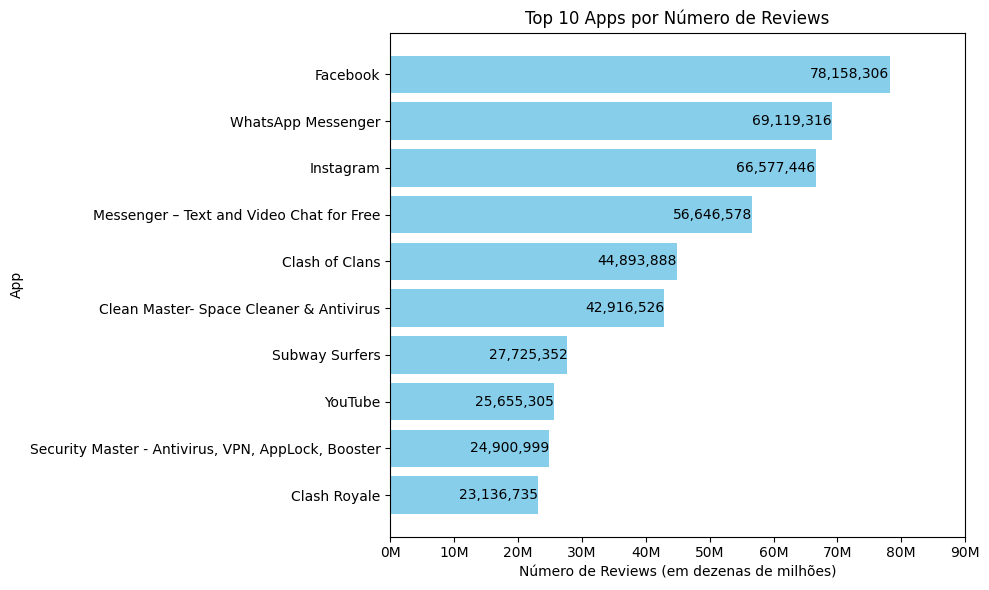

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    # Carregar o arquivo CSV
    df = pd.read_csv("googleplaystore.csv")

    # Remover linhas duplicadas
    df.drop_duplicates(inplace=True)

    # Converter a coluna 'Reviews' para um formato numérico
    df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")

    # Remover linhas com valores inválidos na coluna 'Reviews'
    df.dropna(subset=["Reviews"], inplace=True)

    # Ordenar o DataFrame pelo número de reviews em ordem decrescente
    df_sorted_by_reviews = df.sort_values(by="Reviews", ascending=False)

    # Remover duplicatas mantendo apenas a primeira ocorrência
    df_sorted_by_reviews.drop_duplicates(subset="App", keep="first", inplace=True)

    # Selecionar os top 10 aplicativos por número de reviews
    top_10_apps_reviews = df_sorted_by_reviews.head(10)

    # Criar uma tabela com os top 10 aplicativos por número de reviews
    plt.figure(figsize=(10, 6))
    bars = plt.barh(
        top_10_apps_reviews["App"], top_10_apps_reviews["Reviews"], color="skyblue"
    )
    plt.title("Top 10 Apps por Número de Reviews")
    plt.xlabel("Número de Reviews (em dezenas de milhões)")
    plt.ylabel("App")
    plt.gca().invert_yaxis()  # Inverter o eixo y para que o aplicativo com mais reviews fique no topo

    # Adicionar números de reviews nas barras
    for bar in bars:
        width = bar.get_width()
        plt.text(
            width,
            bar.get_y() + bar.get_height() / 2,
            f"{int(width):,}",
            ha="right",
            va="center",
            fontsize=10,
        )

    # Definir os intervalos do eixo x manualmente
    x_ticks = np.arange(0, 9e7 + 1, 1e7)
    plt.xticks(x_ticks, [f"{int(tick/1e6)}M" for tick in x_ticks])

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(
        "Erro: Arquivo não encontrado. Certifique-se de que o nome do arquivo está correto e o arquivo está na pasta correta."
    )

except Exception as e:
    print("Erro ao carregar o arquivo CSV:", e)

# Top 10 Apps por Número de Instalação


Este código Python analisa dados da loja do Google Play, identificando os 10 principais aplicativos com base no número de instalações. Após carregar e limpar os dados, ele classifica os aplicativos por instalações e os exibe junto com seus números de instalações correspondentes.

In [31]:
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv("googleplaystore.csv")

# Remover linhas duplicadas
df.drop_duplicates(inplace=True)

# Remover linhas com dados errados
df = df.dropna(subset=["App", "Installs"])

# Tratar a coluna 'Installs' para remover caracteres não numéricos e convertê-la para numérico
df["Installs"] = df["Installs"].str.replace(r"[^0-9]", "", regex=True)
df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce")

# Remover linhas com valores nulos na coluna 'Installs'
df.dropna(subset=["Installs"], inplace=True)

# Remover duplicatas mantendo apenas a primeira ocorrência
df.drop_duplicates(subset="App", keep="first", inplace=True)

# Top 10 Apps por Número de Instalações
top_10_apps_installs = df.sort_values(by="Installs", ascending=False).head(10)[
    ["App", "Installs"]
]

print("Top 10 Apps por Número de Instalações:")
for idx, row in top_10_apps_installs.iterrows():
    print(f"{idx+1}. {row['App']}: {row['Installs']}")

Top 10 Apps por Número de Instalações:
337. WhatsApp Messenger: 1000000000.0
153. Google Play Books: 1000000000.0
1655. Subway Surfers: 1000000000.0
3118. Maps - Navigate & Explore: 1000000000.0
341. Gmail: 1000000000.0
2546. Instagram: 1000000000.0
2545. Facebook: 1000000000.0
339. Google Chrome: Fast & Secure: 1000000000.0
2555. Google+: 1000000000.0
3666. YouTube: 1000000000.0


# App Mais caro Existente no DataSet


Este script Python carrega um arquivo CSV contendo dados da loja do Google Play e identifica o aplicativo mais caro listado. Ele remove linhas duplicadas e valores nulos na coluna de preço, além de limpar a formatação do preço para converter em um formato numérico. Em seguida, encontra o índice do aplicativo mais caro e extrai seu nome e preço correspondentes, exibindo-os como saída.

In [32]:
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv("googleplaystore.csv")

# Remover linhas duplicadas
df.drop_duplicates(inplace=True)

# Remover linhas com valores nulos ou vazios na coluna 'Price'
df.dropna(subset=["Price"], inplace=True)

# Tratar a coluna 'Price' para remover caracteres não numéricos e converter para numérico
df["Price"] = df["Price"].str.replace("$", "")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Encontrar o índice do aplicativo mais caro
idx_most_expensive_app = df["Price"].idxmax()

# Obter o nome e o preço do aplicativo mais caro
most_expensive_app_name = df.loc[idx_most_expensive_app, "App"]
most_expensive_app_price = df.loc[idx_most_expensive_app, "Price"]

print("Nome do App Mais Caro:", most_expensive_app_name)
print("Preço do App Mais Caro:", most_expensive_app_price)

Nome do App Mais Caro: I'm Rich - Trump Edition
Preço do App Mais Caro: 400.0


# Outras duas representaçõe gráficas

## Relação entre Rating e Número de Instalações


Este script Python utiliza a biblioteca pandas para carregar um arquivo CSV contendo dados da loja do Google Play e a biblioteca matplotlib para visualizar um gráfico de linhas que mostra a relação entre a classificação média dos aplicativos e o número médio de instalações. Primeiro, remove linhas duplicadas e valores nulos nas colunas de classificação e instalações. Em seguida, substitui 'Free' por 0 na coluna de instalações e remove caracteres adicionais ('+' e ',') antes de converter para números inteiros. Os dados são agrupados pela classificação média e o número médio de instalações é calculado para cada grupo. Por fim, um gráfico de linhas é gerado, mostrando a relação entre a classificação média e o número médio de instalações, com títulos apropriados e uma grade para facilitar a visualização.

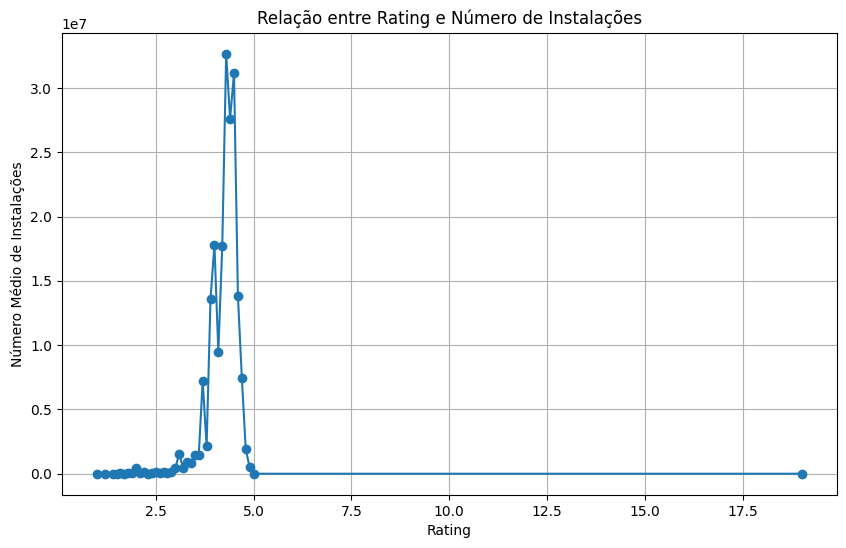

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
df = pd.read_csv("googleplaystore.csv")

# Remover linhas duplicadas e valores nulos
df.drop_duplicates(inplace=True)
df.dropna(subset=["Rating", "Installs"], inplace=True)

# Substituir 'Free' por 0 na coluna 'Installs'
df["Installs"] = df["Installs"].str.replace("Free", "0")

# Remover caracteres '+' e ',' e converter para inteiros
df["Installs"] = df["Installs"].str.replace("+", "").str.replace(",", "").astype(int)

# Agrupar os dados pela classificação média e número médio de instalações
grouped_data = df.groupby("Rating")["Installs"].mean().reset_index()

# Plotar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(grouped_data["Rating"], grouped_data["Installs"], marker="o", linestyle="-")
plt.title("Relação entre Rating e Número de Instalações")
plt.xlabel("Rating")
plt.ylabel("Número Médio de Instalações")
plt.grid(True)
plt.show()

## Relação entre Rating e Número de Avaliações


Este script Python carrega um arquivo CSV contendo dados da loja do Google Play utilizando a biblioteca pandas e gera um gráfico de dispersão para visualizar a relação entre a classificação média dos aplicativos e o número de avaliações. Primeiro, ele remove linhas duplicadas e valores nulos nas colunas de classificação e avaliações. Em seguida, substitui 'M' por 'e6' na coluna de avaliações para representar valores em milhões e converte esses valores para ponto flutuante. Por fim, um gráfico de dispersão é plotado, mostrando a relação entre a classificação média e o número de avaliações, com títulos apropriados e uma grade para facilitar a visualização.

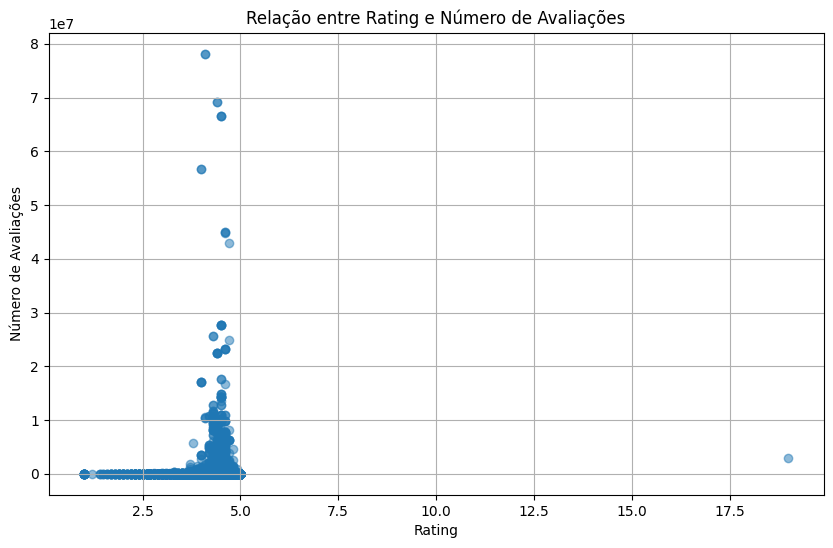

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
df = pd.read_csv("googleplaystore.csv")

# Remover linhas duplicadas e valores nulos
df.drop_duplicates(inplace=True)
df.dropna(subset=["Rating", "Reviews"], inplace=True)

# Substituir 'M' por 'e6' na coluna 'Reviews' e converter para inteiros
df["Reviews"] = df["Reviews"].str.replace("M", "e6").astype(float)

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df["Rating"], df["Reviews"], alpha=0.5)
plt.title("Relação entre Rating e Número de Avaliações")
plt.xlabel("Rating")
plt.ylabel("Número de Avaliações")
plt.grid(True)
plt.show()